In [8]:
import sys
sys.path.append('..')

In [20]:
from src.embed_classifier import MilvusClassifier


cls = MilvusClassifier(source_data='../data/data-sample.csv', text_col='user_text', label_col='cluster_label')

2024-06-25 10:01:21,446 - INFO - Initializing MilvusClassifier
2024-06-25 10:01:21,450 - DEBUG - Created new connection using: 05001c59035a4f06b2167bbf596d921a
2024-06-25 10:01:21,452 - INFO - Use pytorch device_name: cpu
2024-06-25 10:01:21,452 - INFO - Load pretrained SentenceTransformer: Alibaba-NLP/gte-large-en-v1.5
/home/andre/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-06-25 10:01:27,587 - INFO - Setting up schema with dimension 1024
2024-06-25 10:01:27,591 - INFO - Checking if index update is needed
2024-06-25 10:01:27,601 - INFO - No index update needed


In [21]:
res = cls.predict('A', k=2, fields=['label'])

top_entity = max(res, key=lambda x: x['distance'])
top_entity['entity']

2024-06-25 10:01:32,422 - INFO - Predicting top 2 results for query text
Batches: 100%|██████████| 1/1 [00:00<00:00,  6.50it/s]
2024-06-25 10:01:32,583 - INFO - Prediction completed


{'label': 'SpiritualInquiry'}

In [17]:
res = cls.predict('A chatbot', k=2, fields=['label'])

top_entity = max(res, key=lambda x: x['distance'])
top_entity['entity']

2024-06-25 09:51:29,439 - INFO - Predicting top 2 results for query text
Batches: 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]
2024-06-25 09:51:29,628 - INFO - Prediction completed


{'label': 'ChatbotandDiscordBotDevelopmentandHelp'}

In [19]:
res = cls.predict('Can god save the human species?', k=2, fields=['label'])

top_entity = max(res, key=lambda x: x['distance'])
top_entity['entity']

2024-06-25 09:52:13,462 - INFO - Predicting top 2 results for query text
Batches: 100%|██████████| 1/1 [00:00<00:00,  4.52it/s]
2024-06-25 09:52:13,690 - INFO - Prediction completed


{'label': 'SpiritualInquiry'}

In [22]:
import pandas as pd

df = pd.read_csv('../data/data.csv')

In [26]:
(df.shape[0], df['cluster_label'].nunique())

(1275, 60)

<Axes: >

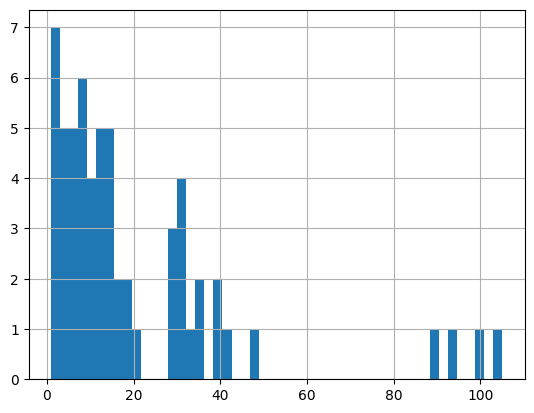

In [30]:
df['cluster_label'].value_counts().hist(bins=50)